# Word2Vec

This notebook explores Word2Vec embeddings to understand how they capture semantic relationships.

Uses pre-trained embeddings from Google News (trained on ~100 billion words).

<a target="_blank" href="https://colab.research.google.com/github/simonguest/CS-394/blob/main/src/01/notebooks/word2vec.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://github.com/simonguest/CS-394/raw/refs/heads/main/src/01/notebooks/word2vec.ipynb">
  <img src="https://img.shields.io/badge/Download_.ipynb-blue" alt="Download .ipynb"/>
</a>

## Install required packages

In [ ]:
!uv pip install gensim numpy matplotlib scikit-learn -q

## Load pretrained Word2Vec model

In [11]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load pre-trained Word2Vec model (Google News, 300-dimensional vectors)
print("Loading Word2Vec model...")
model = api.load('word2vec-google-news-300')
print(f"Model loaded. Vocabulary size: {len(model)} words")
print(f"Vector dimension: {model.vector_size}") # type: ignore

Loading Word2Vec model...
Model loaded. Vocabulary size: 3000000 words
Vector dimension: 300


In [ ]:
word = "cat"
vector = model[word]
vector[:10]

array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
        0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656],
      dtype=float32)

In [ ]:
word = "dog"
vector = model[word]
vector[:10]

array([ 0.05126953, -0.02233887, -0.17285156,  0.16113281, -0.08447266,
        0.05737305,  0.05859375, -0.08251953, -0.01538086, -0.06347656],
      dtype=float32)

In [ ]:
word = "pizza"
vector = model[word]
vector[:10]

array([-1.2597656e-01,  2.5390625e-02,  1.6699219e-01,  5.5078125e-01,
       -7.6660156e-02,  1.2890625e-01,  1.0253906e-01, -3.9482117e-04,
        1.2158203e-01,  4.3212891e-02], dtype=float32)

## Find similar words

Words with similar meanings have similar vectors.

In [ ]:
def find_similar_words(word, top_n=10):
    """Find the most similar words to a given word."""
    try:
        similar = model.most_similar(word, topn=top_n) # type: ignore
        print(f"\nWords most similar to '{word}':")
        print("-" * 40)
        for similar_word, similarity in similar:
            print(f"{similar_word:20s} | similarity: {similarity:.4f}")
    except KeyError:
        print(f"Word '{word}' not in vocabulary")

In [ ]:
find_similar_words("cat")
find_similar_words("dog")
find_similar_words("pizza")


Words most similar to 'cat':
----------------------------------------
cats                 | similarity: 0.8099
dog                  | similarity: 0.7609
kitten               | similarity: 0.7465
feline               | similarity: 0.7326
beagle               | similarity: 0.7151
puppy                | similarity: 0.7075
pup                  | similarity: 0.6934
pet                  | similarity: 0.6892
felines              | similarity: 0.6756
chihuahua            | similarity: 0.6710

Words most similar to 'dog':
----------------------------------------
dogs                 | similarity: 0.8680
puppy                | similarity: 0.8106
pit_bull             | similarity: 0.7804
pooch                | similarity: 0.7627
cat                  | similarity: 0.7609
golden_retriever     | similarity: 0.7501
German_shepherd      | similarity: 0.7465
Rottweiler           | similarity: 0.7438
beagle               | similarity: 0.7419
pup                  | similarity: 0.7407

Words most simila

## Compute similarity

In [20]:
def compute_similarity(word1, word2):
    """Compute cosine similarity between two words."""
    try:
        similarity = model.similarity(word1, word2) # type: ignore
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError as e:
        print(f"Word not in vocabulary: {e}")

In [21]:
compute_similarity('cat', 'dog')
compute_similarity('cat', 'kitten')
compute_similarity('cat', 'car')
compute_similarity('doctor', 'hospital')
compute_similarity('king', 'queen')

Similarity between 'cat' and 'dog': 0.7609
Similarity between 'cat' and 'kitten': 0.7465
Similarity between 'cat' and 'car': 0.2153
Similarity between 'doctor' and 'hospital': 0.5143
Similarity between 'king' and 'queen': 0.6511


## Vector arithmetic

In [ ]:
def vector_arithmetic(positive, negative, top_n=5):
    """Perform vector arithmetic: positive words - negative words."""
    try:
        result = model.most_similar(positive=positive, negative=negative, topn=top_n) # type: ignore
        print(f"\n{' + '.join(positive)} - {' - '.join(negative)}:")
        print("-" * 50)
        for word, similarity in result:
            print(f"{word:20s} | similarity: {similarity:.4f}")
    except KeyError as e:
        print(f"Word not in vocabulary: {e}")

In [ ]:
vector_arithmetic(['king', 'woman'], ['man'])
vector_arithmetic(['Paris', 'Italy'], ['France'])
vector_arithmetic(['walking', 'swim'], ['walk'])


king + woman - man:
--------------------------------------------------
queen                | similarity: 0.7118
monarch              | similarity: 0.6190
princess             | similarity: 0.5902
crown_prince         | similarity: 0.5499
prince               | similarity: 0.5377

Paris + Italy - France:
--------------------------------------------------
Milan                | similarity: 0.7222
Rome                 | similarity: 0.7028
Palermo_Sicily       | similarity: 0.5968
Italian              | similarity: 0.5911
Tuscany              | similarity: 0.5633

walking + swim - walk:
--------------------------------------------------
swimming             | similarity: 0.8246
swam                 | similarity: 0.6807
swims                | similarity: 0.6538
swimmers             | similarity: 0.6495
paddling             | similarity: 0.6424


## 2D visualization

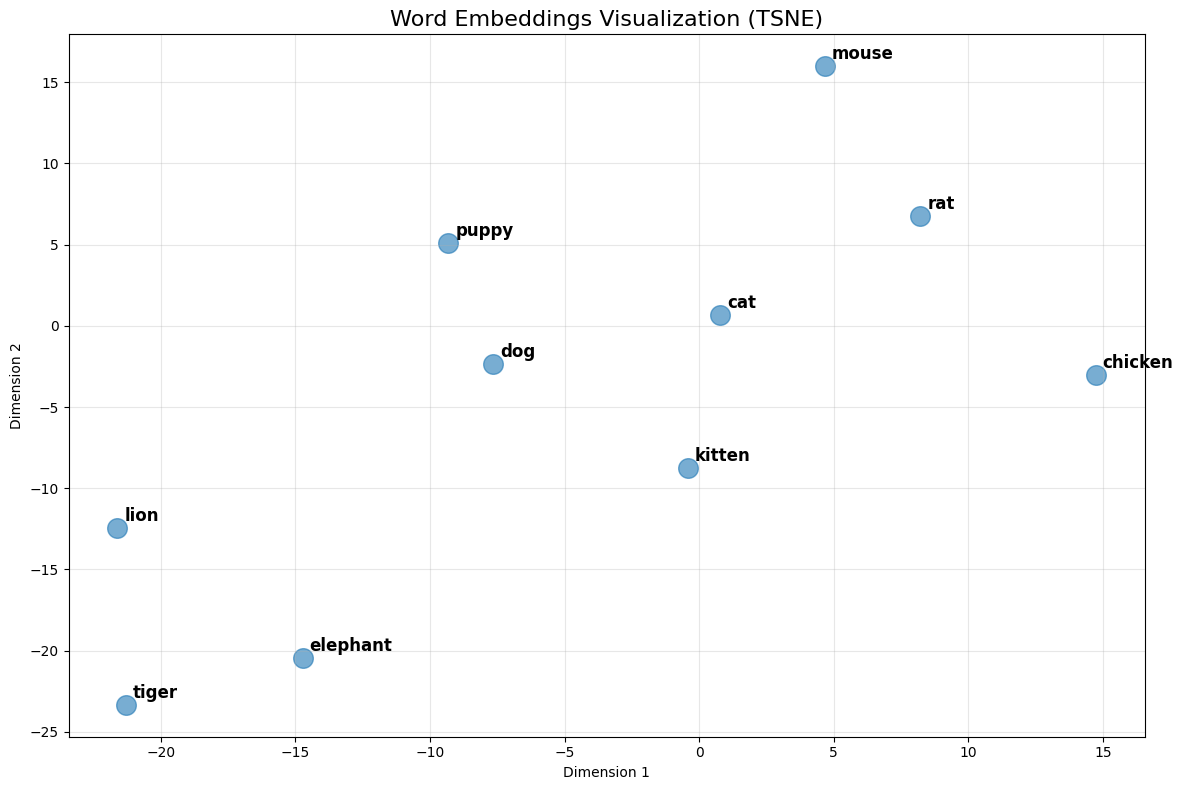

In [18]:
def visualize_words(words, method='tsne'):
    """Visualize word embeddings in 2D."""
    # Get vectors for words that exist in vocabulary
    valid_words = [w for w in words if w in model]
    if len(valid_words) < 2:
        print("Need at least 2 valid words to visualize")
        return
    
    vectors = np.array([model[w] for w in valid_words])
    
    # Reduce to 2D
    if method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(5, len(valid_words)-1))
    else:
        reducer = PCA(n_components=2, random_state=42)
    
    vectors_2d = reducer.fit_transform(vectors)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=200, alpha=0.6)
    
    for i, word in enumerate(valid_words):
        plt.annotate(word, 
                    xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=12,
                    fontweight='bold')
    
    plt.title(f'Word Embeddings Visualization ({method.upper()})', fontsize=16)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

words = ['cat', 'dog', 'kitten', 'puppy', 'lion', 'tiger', 'elephant', 'mouse', 'chicken', 'rat']
visualize_words(words)
